# <center>Predict Loan Eligibility for Dream Housing Finance company</center>

![image](https://datahack-prod.s3.ap-south-1.amazonaws.com/__sized__/contest_cover/loanpre-thumbnail-1200x1200.png)

# <center> Problem Statement</center>

Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers. 

In [96]:
import pandas as pd

import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

# for interactivity
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual

from sklearn.metrics import classification_report, confusion_matrix
import sweetviz

import warnings
import pickle

import ppscore as pps

import missingno as mno

warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv("train.csv")

In [3]:
print("Train data shape : ",train.shape)

Train data shape :  (614, 13)


In [4]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
train["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [9]:
train["Loan_Status"] = train["Loan_Status"].replace("Y" , 1)
train["Loan_Status"] = train["Loan_Status"].replace("N" , 0)

<AxesSubplot:ylabel='Loan_Status'>

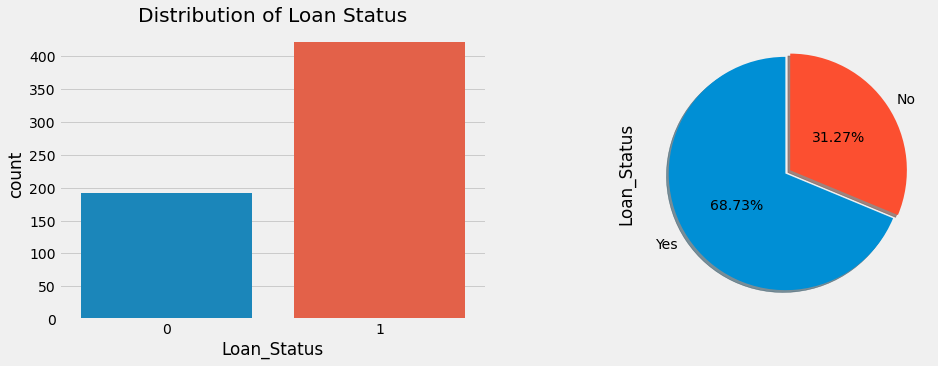

In [10]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
sns.countplot(train['Loan_Status'],)
plt.title("Distribution of Loan Status")


plt.subplot(1, 2, 2)
train['Loan_Status'].value_counts().plot(kind = 'pie', explode = [0, 0.05], autopct = '%.2f%%', startangle = 90,
                                       labels = ['Yes','No'], shadow = True, pctdistance = 0.5)

# Missing Value

<center>Treatment of Training Data Missing Values</center>

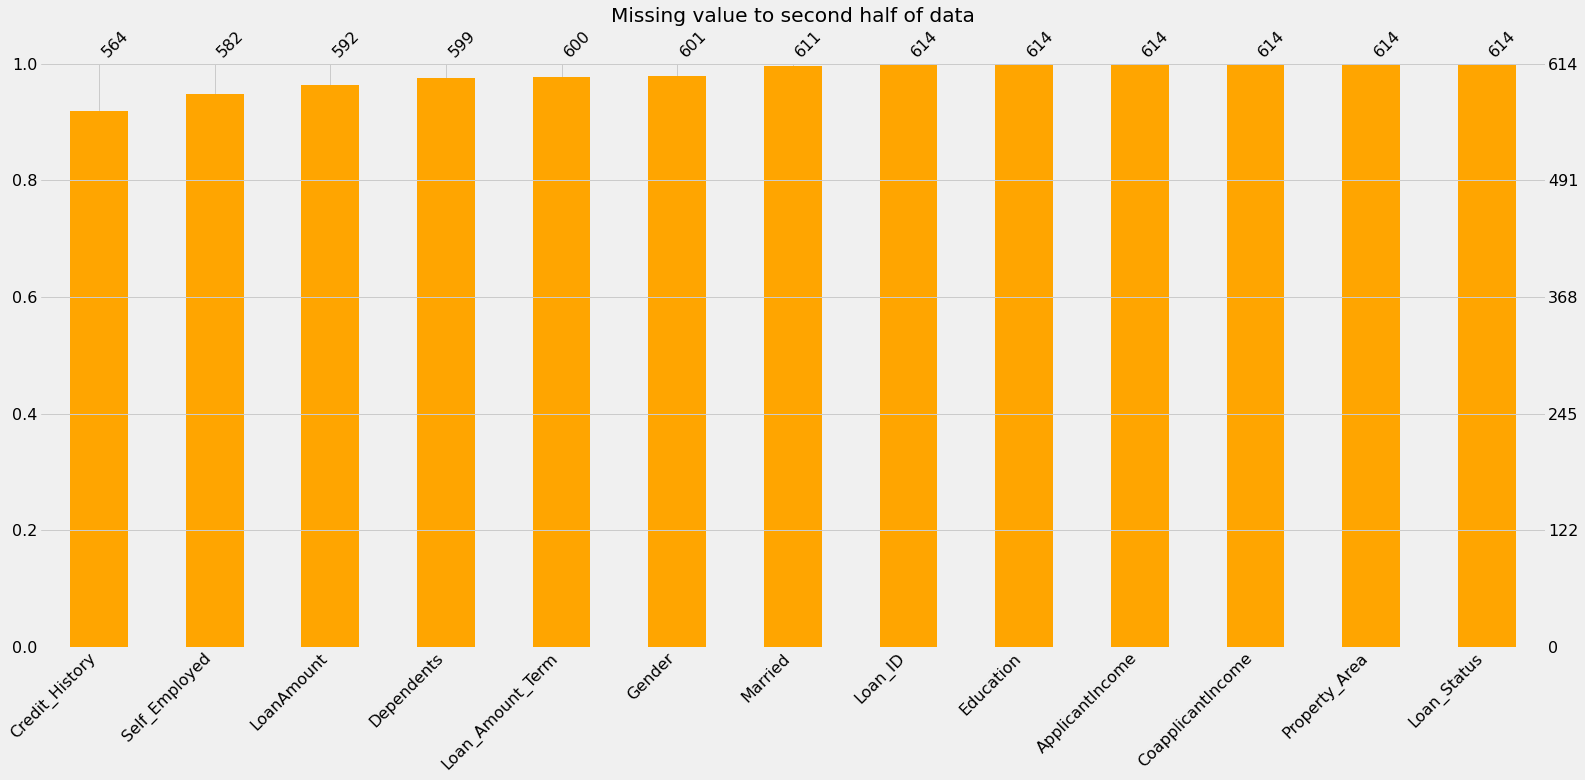

In [11]:

mno.bar(train,
        color= "orange",
        sort="ascending"
       )
plt.title("Missing value to second half of data")
plt.show()

In [12]:
train["Gender"].fillna(train["Gender"].mode()[0], inplace=True)
train["Married"].fillna(train["Married"].mode()[0], inplace=True)
train["Dependents"].fillna(train["Dependents"].mode()[0], inplace=True)
train["Self_Employed"].fillna(train["Self_Employed"].mode()[0], inplace=True)
train["Loan_Amount_Term"].fillna(train["Loan_Amount_Term"].mode()[0], inplace=True)
train["Credit_History"].fillna(train["Credit_History"].mode()[0], inplace=True)
train["LoanAmount"].fillna(train["LoanAmount"].median(), inplace=True)

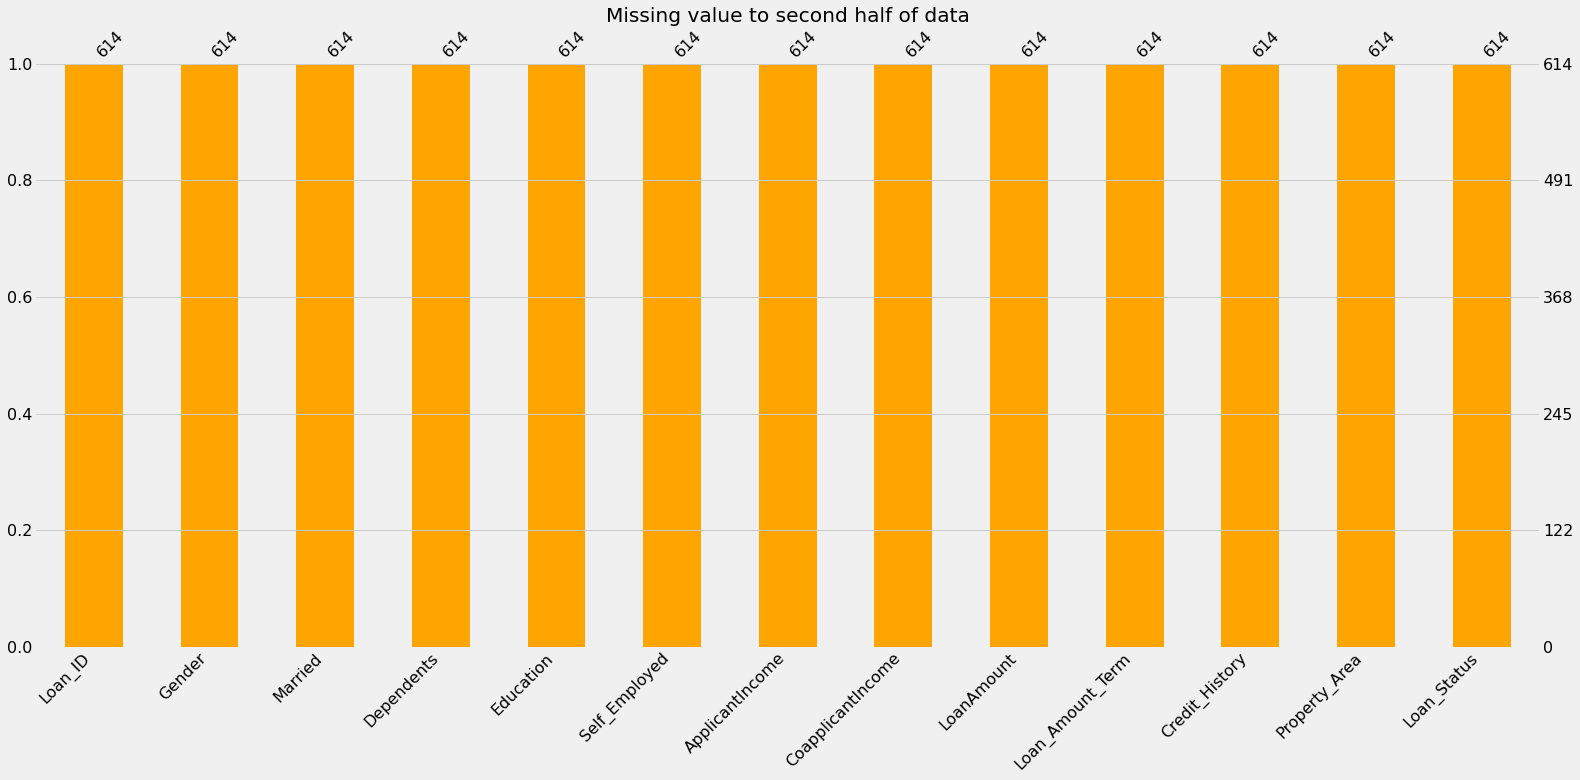

In [13]:
mno.bar(train,
        color= "orange",
        sort="ascending"
       )
plt.title("Missing value to second half of data")
plt.show()

In [14]:
train.isnull().sum().sum()

0

# Data Visualization

## <center>Univariate Analysis</center>

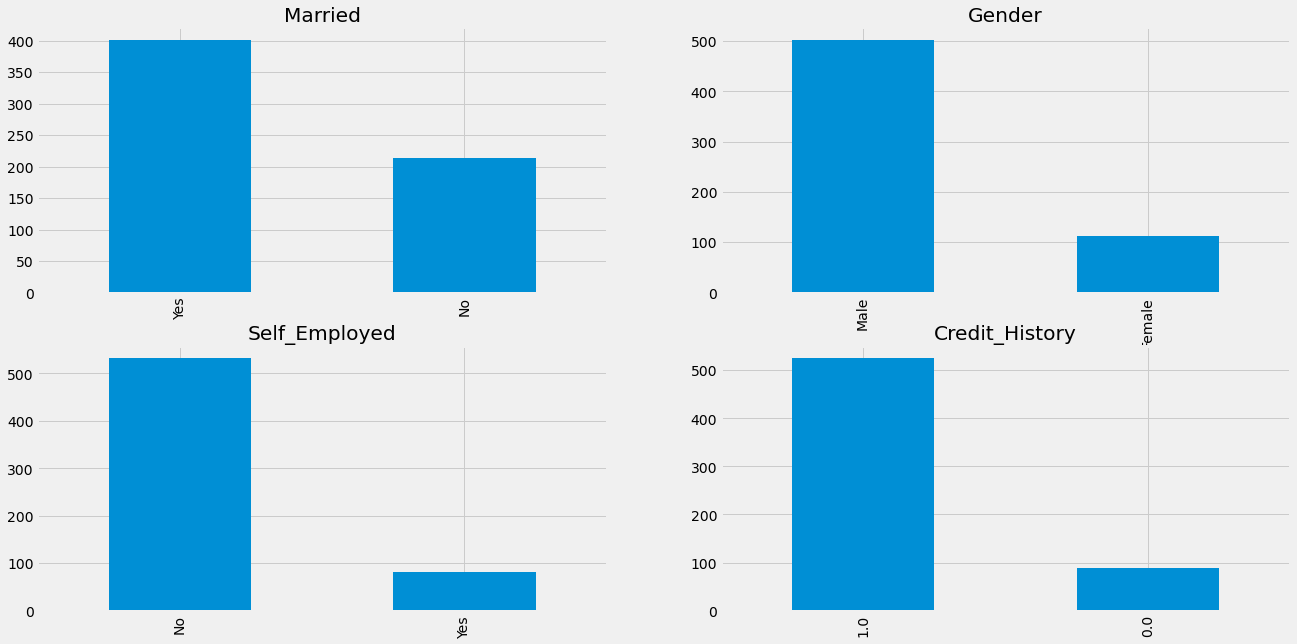

In [15]:

plt.subplot(2,2,1)
train["Married"].value_counts().plot.bar(figsize=(20,10))
plt.title("Married")

plt.subplot(2,2,2)
train["Gender"].value_counts().plot.bar()
plt.title("Gender")

plt.subplot(2,2,3)
train["Self_Employed"].value_counts().plot.bar()
plt.title("Self_Employed")

plt.subplot(2,2,4)
train["Credit_History"].value_counts().plot.bar()
plt.title("Credit_History")

plt.show()

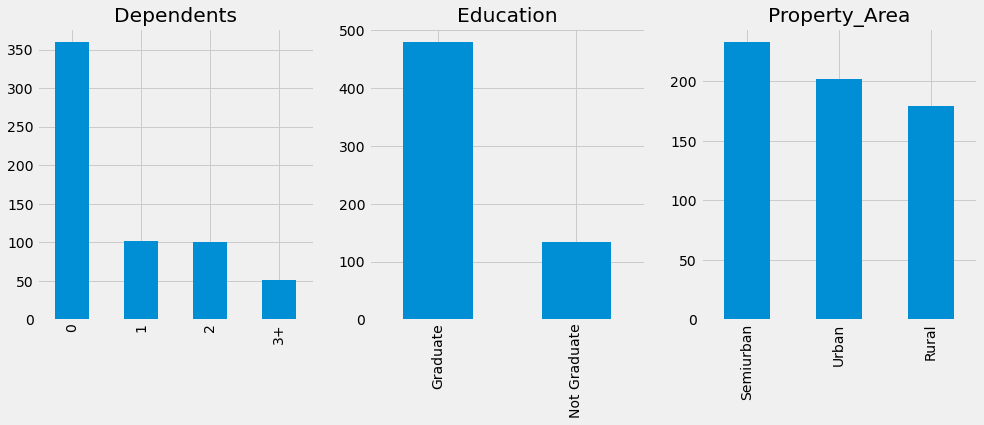

In [16]:
plt.subplot(1,3,1)
train["Dependents"].value_counts().plot.bar()
plt.title("Dependents")

plt.subplot(1,3,2)
train["Education"].value_counts().plot.bar()
plt.title("Education")

plt.subplot(1,3,3)
train["Property_Area"].value_counts().plot.bar()
plt.title("Property_Area")



plt.show()

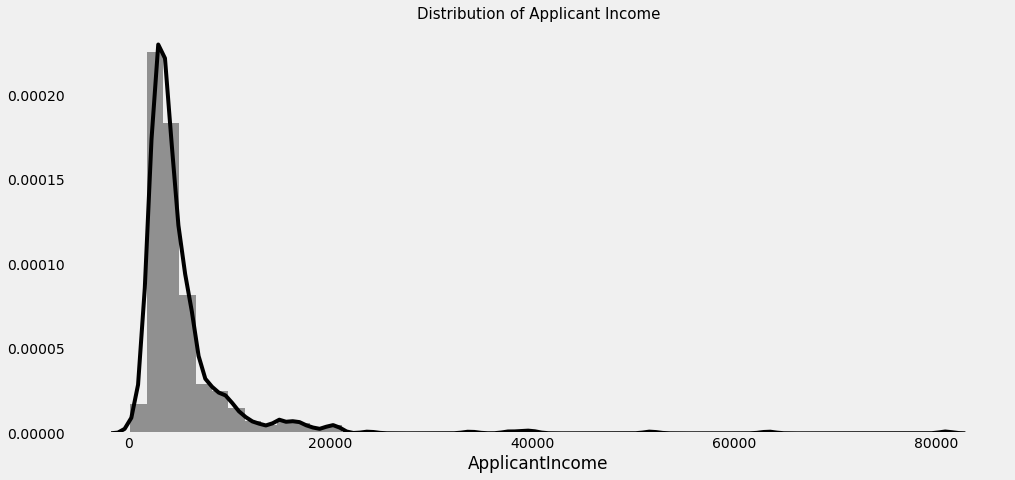

In [17]:
plt.rcParams["figure.figsize"] =(15,7)
sns.distplot(train["ApplicantIncome"], color="black")
plt.title("Distribution of Applicant Income", fontsize=15)
plt.grid()
plt.show()

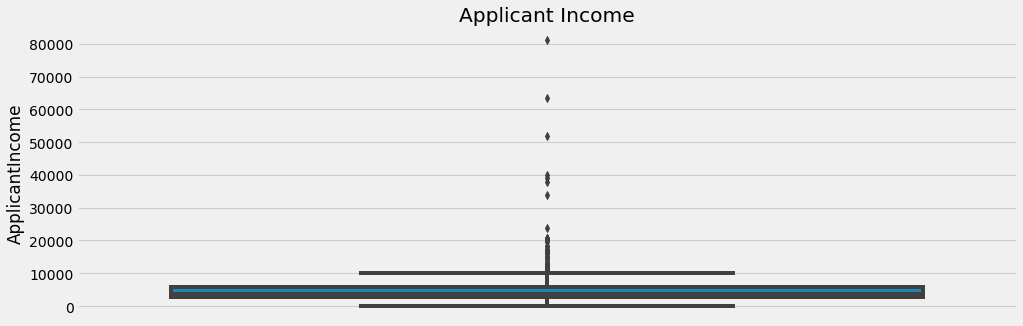

In [18]:
plt.rcParams["figure.figsize"] =(15,5)
sns.boxplot(y =train["ApplicantIncome"])
plt.title("Applicant Income")
plt.show()

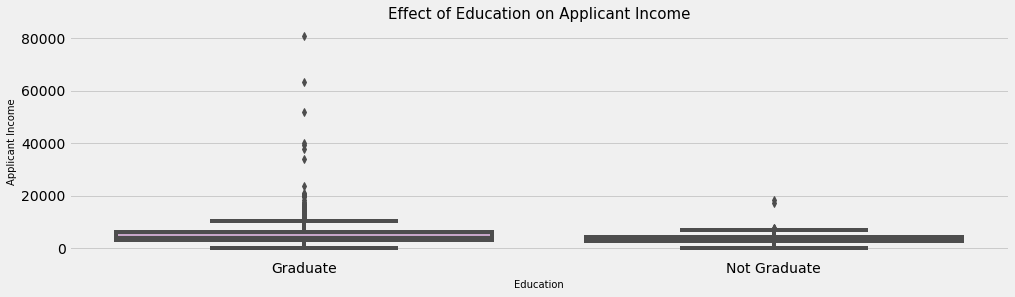

In [19]:
plt.rcParams['figure.figsize'] = (15,4)
sns.boxplot(train['Education'], train['ApplicantIncome'], palette = 'PuRd')
plt.title('Effect of Education on Applicant Income', fontsize = 15)
plt.xlabel('Education', fontsize = 10)
plt.ylabel('Applicant Income', fontsize = 10)
plt.show()

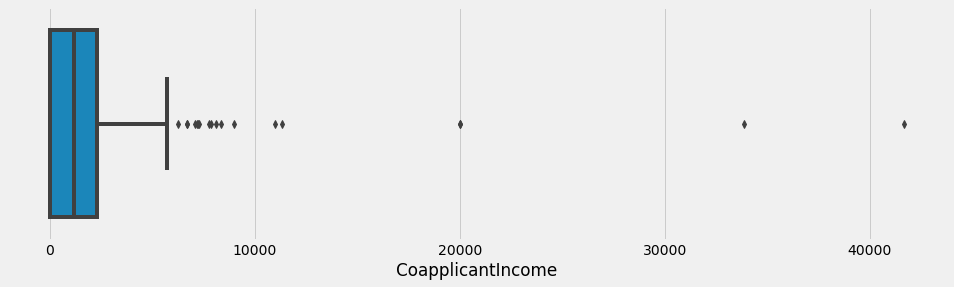

In [20]:
sns.boxplot(train["CoapplicantIncome"])
plt.show()

In [21]:
my_report = sweetviz.analyze(train, target_feat= "Loan_Status")
my_report.show_html('Joint_Loan.html')

:FEATURES DONE:                    |█████████████████████| [100%]   00:02  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!
Report Joint_Loan.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


## <center>Bivariate Analysis</center>

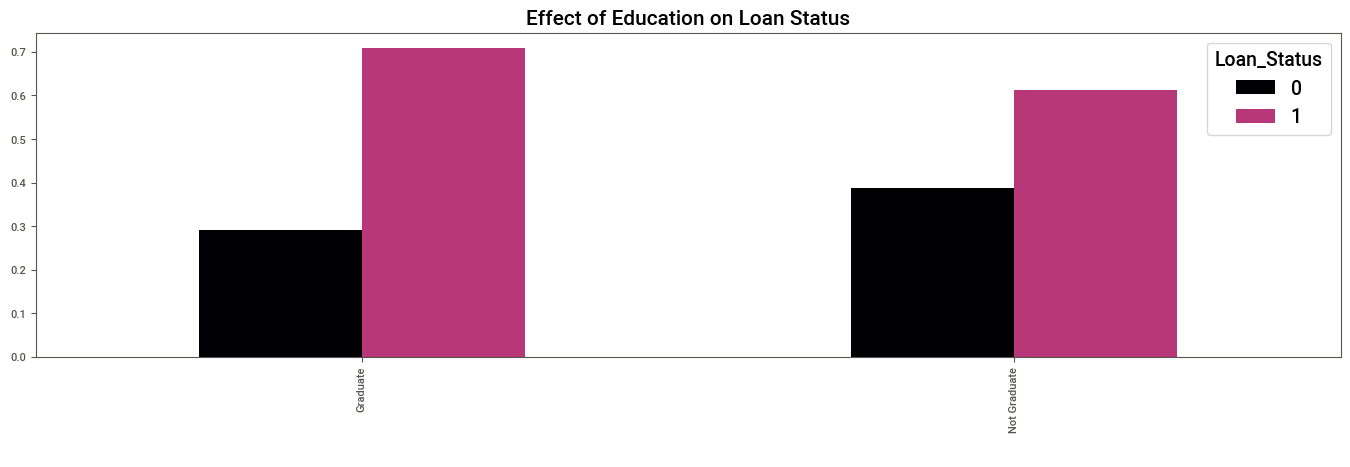

In [22]:
plt.rcParams['figure.figsize'] = (15,4)
x = pd.crosstab(train['Education'], train['Loan_Status'])
colors = plt.cm.magma(np.linspace(0, 1, 3))
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = False, color = colors)
plt.title('Effect of Education on Loan Status', fontsize = 15)
plt.xlabel(' ')
plt.show()

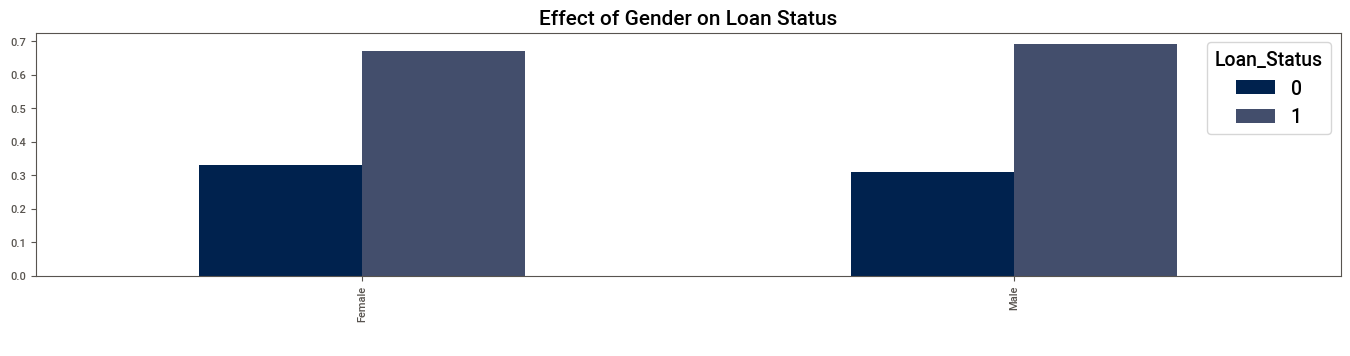

In [23]:
plt.rcParams['figure.figsize'] = (15, 3)
x = pd.crosstab(train['Gender'], train['Loan_Status'])
colors = plt.cm.cividis(np.linspace(0, 1, 5))
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = False, color = colors)
plt.title('Effect of Gender on Loan Status', fontsize = 15)
plt.xlabel(' ')
plt.show()

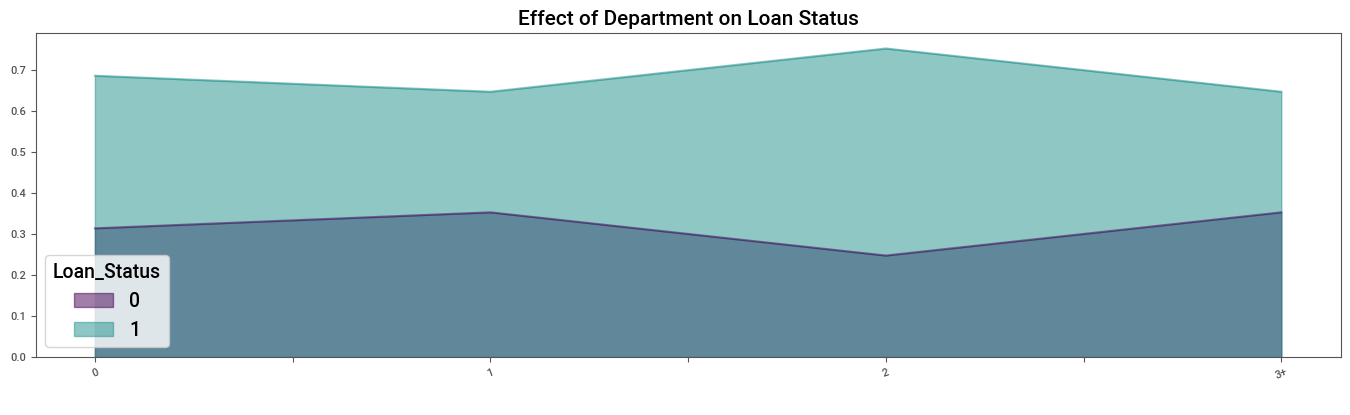

In [24]:
plt.rcParams['figure.figsize'] = (15,4)
x = pd.crosstab(train['Dependents'], train['Loan_Status'])
colors = plt.cm.viridis(np.linspace(0, 1, 3))
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'area', stacked = False, color = colors)
plt.title('Effect of Department on Loan Status', fontsize = 15)
plt.xticks(rotation = 20)
plt.xlabel(' ')
plt.show()

In [25]:
plt.rcParams['figure.figsize'] = (15, 4)
@interact_manual
def bivariate_plot(column1 = list(train.select_dtypes('object').columns),
                   column2 = list(train.select_dtypes('number').columns[1:])):
    sns.barplot(train[column1], train[column2])

interactive(children=(Dropdown(description='column1', options=('Loan_ID', 'Gender', 'Married', 'Dependents', '…

## <center>Multivariate Analysis</Center>
Multivariate analysis is based on the principles of multivariate statistics, which involves observation and analysis of more than one statistical outcome variable at a time.

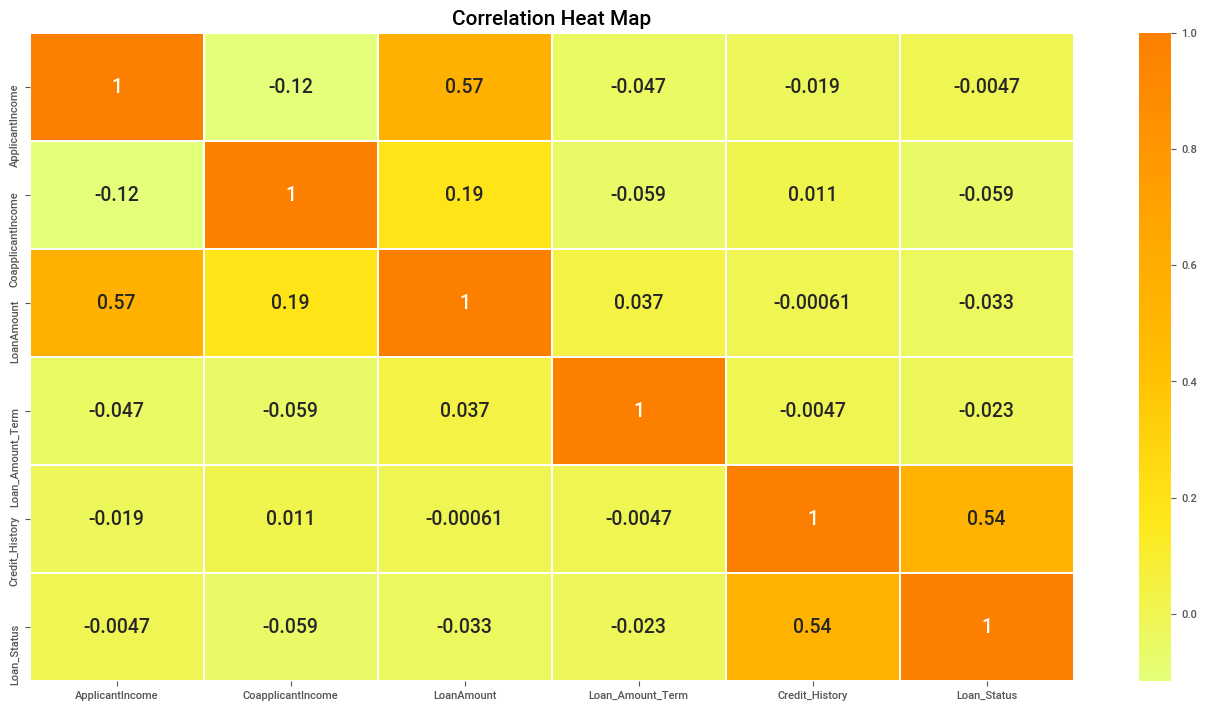

In [26]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(train.corr(), annot = True, linewidth = 0.5, cmap = 'Wistia')
plt.title('Correlation Heat Map', fontsize = 15)
plt.show()

# Outlier Treatment

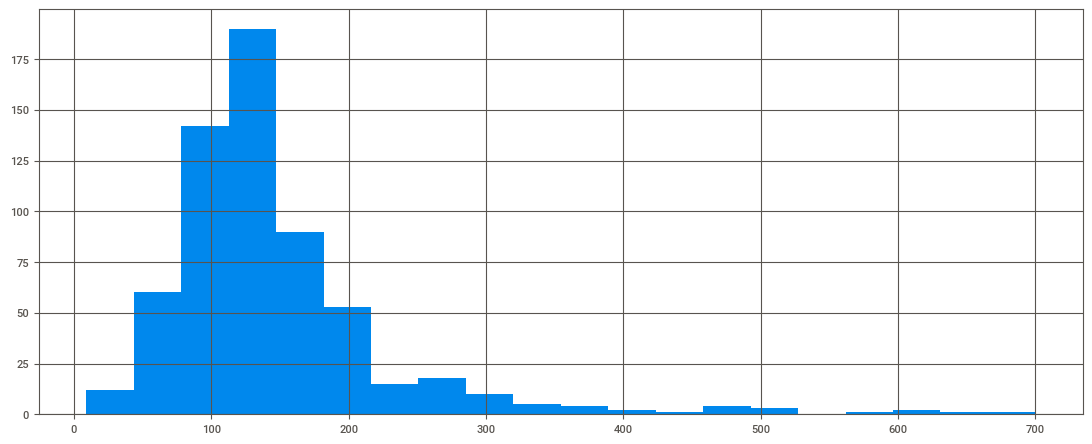

In [27]:
plt.rcParams["figure.figsize"] = (12,5)
train["LoanAmount"].hist(bins=20),
plt.show()

In [28]:
train["LoanAmount_log"] = np.log(train["LoanAmount"])

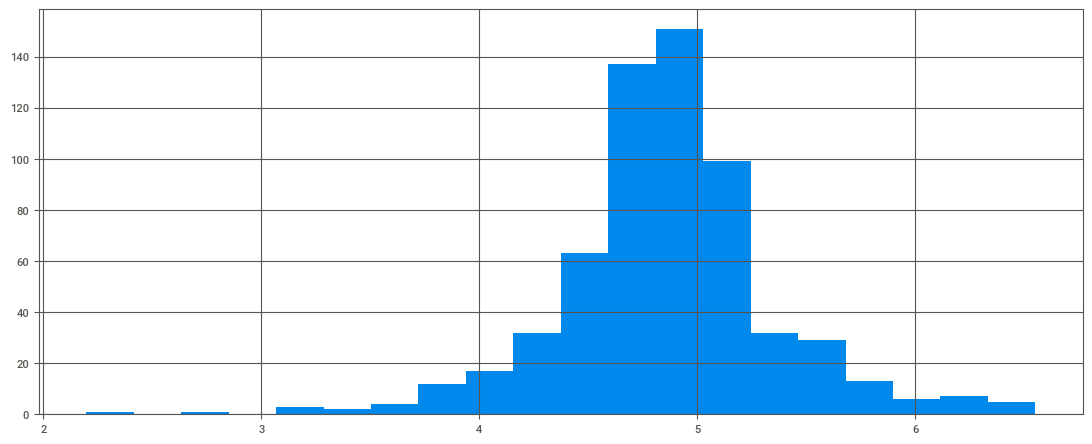

In [29]:
train["LoanAmount_log"].hist(bins=20)
plt.show()

In [30]:
train["total_income"] = train["ApplicantIncome"] + train["CoapplicantIncome"]

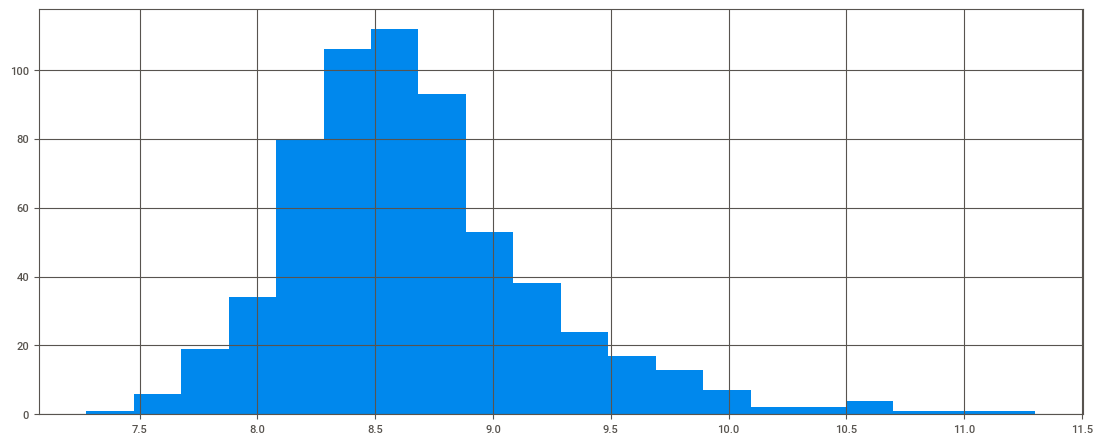

In [31]:
np.log(train["total_income"]).hist(bins=20)
plt.show()

In [32]:
train["total_income"] = np.log(train.total_income)

# Model Building

In [33]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'LoanAmount_log', 'total_income'],
      dtype='object')

In [34]:
x_label = ['Loan_ID', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

y_label = ["Loan_Status"]

In [35]:
train = train.drop(x_label,1)

In [36]:
x = train.drop("Loan_Status",1)
y = train.Loan_Status

In [37]:
print(x.shape)
print(y.shape)

(614, 10)
(614,)


In [38]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,total_income
0,Male,No,0,Graduate,No,360.0,1.0,Urban,4.852030,8.674026
1,Male,Yes,1,Graduate,No,360.0,1.0,Rural,4.852030,8.714568
2,Male,Yes,0,Graduate,Yes,360.0,1.0,Urban,4.189655,8.006368
3,Male,Yes,0,Not Graduate,No,360.0,1.0,Urban,4.787492,8.505323
4,Male,No,0,Graduate,No,360.0,1.0,Urban,4.948760,8.699515


In [39]:
x = pd.get_dummies(x)

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,stratify =y, random_state=0, shuffle=True)

In [41]:
y_test.value_counts(normalize=True)

1    0.686486
0    0.313514
Name: Loan_Status, dtype: float64

In [42]:
y_train.value_counts(normalize=True)

1    0.687646
0    0.312354
Name: Loan_Status, dtype: float64

In [43]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(429, 19)
(185, 19)
(429,)
(185,)


###  Logistic Regression

In [46]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [47]:
lr.score(x_train, y_train)

0.8018648018648019

In [48]:
lr.score(x_test, y_test)

0.827027027027027

In [103]:
 y_pred = lr.predict(x_test)

In [94]:
pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.964286,0.802548,0.827027,0.883417,0.853255
recall,0.465517,0.992126,0.827027,0.728822,0.827027
f1-score,0.627907,0.887324,0.827027,0.757615,0.805993
support,58.000000,127.000000,0.827027,185.000000,185.000000


In [104]:
confusion_matrix(y_test, y_pred)

array([[ 27,  31],
       [  1, 126]], dtype=int64)

### Support Vector Classifiers

In [49]:
from sklearn.svm import SVC
svc = SVC(kernel="linear")

In [50]:
svc.fit(x_train, y_train)

SVC(kernel='linear')

In [51]:
svc.score(x_train, y_train)

0.8018648018648019

In [52]:
svc.score(x_test, y_test)

0.827027027027027

In [106]:
y_pred = svc.predict(x_test)
pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.964286,0.802548,0.827027,0.883417,0.853255
recall,0.465517,0.992126,0.827027,0.728822,0.827027
f1-score,0.627907,0.887324,0.827027,0.757615,0.805993
support,58.000000,127.000000,0.827027,185.000000,185.000000


In [107]:
confusion_matrix(y_test, y_pred)

array([[ 27,  31],
       [  1, 126]], dtype=int64)

## XGboost

In [53]:
from sklearn.ensemble import GradientBoostingClassifier

In [54]:
gbc = GradientBoostingClassifier(loss="exponential" ,random_state=0, )

In [55]:
gbc.fit(x_train, y_train)

GradientBoostingClassifier(loss='exponential', random_state=0)

In [56]:
gbc.score(x_train, y_train)

0.8857808857808858

In [57]:
gbc.score(x_test, y_test)

0.8162162162162162

In [58]:
gbc.score(x_test, y_test)

0.8162162162162162

In [108]:
y_pred = gbc.predict(x_test)
pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.928571,0.796178,0.816216,0.862375,0.837685
recall,0.448276,0.984252,0.816216,0.716264,0.816216
f1-score,0.604651,0.880282,0.816216,0.742466,0.793868
support,58.000000,127.000000,0.816216,185.000000,185.000000


In [109]:
confusion_matrix(y_test, y_pred)

array([[ 26,  32],
       [  2, 125]], dtype=int64)

# DecisionTreeClassifier

In [61]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
dtc =  DecisionTreeClassifier()

In [63]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [64]:
dtc.score(x_train, y_train)

1.0

In [65]:
dtc.score(x_test, y_test)

0.7405405405405405

In [66]:
dtc = DecisionTreeClassifier(min_samples_split=20, max_depth=3 )

In [67]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_split=20)

In [68]:
dtc.score(x_train, y_train)

0.8135198135198135

In [69]:
dtc.score(x_test, y_test)

0.8324324324324325

In [110]:
y_pred = dtc.predict(x_test)
pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.909091,0.815789,0.832432,0.862440,0.845041
recall,0.517241,0.976378,0.832432,0.746810,0.832432
f1-score,0.659341,0.888889,0.832432,0.774115,0.816922
support,58.000000,127.000000,0.832432,185.000000,185.000000


In [111]:
confusion_matrix(y_test, y_pred)

array([[ 30,  28],
       [  3, 124]], dtype=int64)

## Random Forest

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
rfc = RandomForestClassifier()

In [72]:
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [73]:
rfc.score(x_train, y_train)

1.0

In [74]:
rfc.score(x_test, y_test)

0.8

In [75]:
rfc = RandomForestClassifier(n_estimators=200, min_samples_split=20, max_depth=3 )

In [76]:
rfc.fit(x_train, y_train)
rfc.score(x_train, y_train)

0.8018648018648019

In [77]:
rfc.score(x_test, y_test)

0.827027027027027

In [112]:
y_pred = rfc.predict(x_test)
pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.964286,0.802548,0.827027,0.883417,0.853255
recall,0.465517,0.992126,0.827027,0.728822,0.827027
f1-score,0.627907,0.887324,0.827027,0.757615,0.805993
support,58.000000,127.000000,0.827027,185.000000,185.000000


In [113]:
confusion_matrix(y_test, y_pred)

array([[ 27,  31],
       [  1, 126]], dtype=int64)

## KNeighborsClassifier

In [78]:
from sklearn.neighbors import KNeighborsClassifier

In [79]:
knc = KNeighborsClassifier(n_neighbors=15)

In [80]:
knc.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [81]:
knc.score(x_train, y_train)

0.7226107226107226

In [82]:
knc.score(x_test, y_test)

0.7243243243243244

In [114]:
y_pred = knc.predict(x_test)
pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.888889,0.715909,0.724324,0.802399,0.770141
recall,0.137931,0.992126,0.724324,0.565029,0.724324
f1-score,0.238806,0.831683,0.724324,0.535245,0.645808
support,58.000000,127.000000,0.724324,185.000000,185.000000


In [115]:
confusion_matrix(y_test, y_pred)

array([[  8,  50],
       [  1, 126]], dtype=int64)